# IMPORTS

In [ ]:
!pip install pandas
!pip install numpy

  Using cached https://files.pythonhosted.org/packages/00/08/8ef0163451d9df896e53743c58e53162845ab1788957d194988ce3a6b301/pandas-1.3.2-cp37-cp37m-macosx_10_9_x86_64.whl
    100% |████████████████████████████████| 16.9MB 22kB/s  eta 0:00:01   24% |████████                        | 4.2MB 13.0MB/s eta 0:00:01██████                   | 6.8MB 28.1MB/s eta 0:00:01
lazypredict 0.2.9 has requirement numpy==1.19.1, but you'll have numpy 1.21.2 which is incompatible.
lazypredict 0.2.9 has requirement pandas==1.0.5, but you'll have pandas 1.3.2 which is incompatible.
lazypredict 0.2.9 has requirement PyYAML==5.3.1, but you'll have pyyaml 3.13 which is incompatible.
lazypredict 0.2.9 has requirement xgboost==1.1.1, but you'll have xgboost 0.80 which is incompatible.


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, RidgeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [ ]:
#!pip install git+https://github.com/tensorflow/docs

#import tensorflow_docs as tfdocs
#import tensorflow_docs.modeling
#import tensorflow_docs.plots

# DATA

* habilitar acesso para salvar no resultados no drive e definir path da planilha resultados

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
path = '/Volumes/EXT/EXTDocumentos/UFPE/2021.1/Redes neurais/project/Projeto/Resultados.xlsx'


* index_col para criar multindex com data e hora
* header para criar multilevels com velocidade e equipamento

In [ ]:
X = pd.read_csv('https://www.cin.ufpe.br/~amal/dados/transito/DATAMART/inputhgeralpivot.csv', index_col=[0,1], header=[0,1])
#X = pd.read_csv('https://www.cin.ufpe.br/~amal/dados/transito/DATAMART/inputhfaixapivot.csv', index_col=[0,1], header=[0,1,2])

In [ ]:
X.head()

In [ ]:
X.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
X.shape

* index_col para criar multindex com data e hora
* header para criar multilevels com count e bairro
* drop pra apagar essa coluna 0 q não serve pra nada
* count pra ignorar os dados de qtd de vítimas, somente acidentes

In [ ]:
Xg = pd.read_csv('https://www.cin.ufpe.br/~amal/dados/transito/DATAMART/inputhgeralpivot.csv', index_col=[0,1], header=[0,1])
Xg = Xg.drop('latitude',axis=1).drop('longitude',axis=1).drop('tipo_y',axis=1)
Xg = Xg.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
Xg.sum(axis=0).sort_values()

In [ ]:
Xg.isna().sum().sum() / Xg.isna().count().sum()

In [ ]:
#Xg[Xg.columns[0:11]]
#Xg[Xg.columns[0:11]].sort_values(Xg.columns[5],ascending=False)
#Xg[Xg.columns[0:11]].iloc[52*24+10].plot.bar()
#Xg[Xg.columns[0:11]].iloc[348*24+4].plot.bar()

In [ ]:
selecao_bairros = ['Areias', 'Beberibe' ,'Boa Viagem' ,'Boa Vista' ,'Cabanga', 'Casa Amarela' , 'Casa Forte' ,'Caçote' ,'Curado' ,'Derby' ,'Estância' ,'Graças' ,'Imbiribeira' ,'Iputinga' ,'Jiquiá' ,'Macaxeira' ,'Madalena' ,'Paissandu' ,'Pina' , 'Prado' ,'Bairro do Recife' ,'Santo Amaro' ,'São José' ,'Tamarineira' ,'Tejipió' ,'Torrões' ,'Várzea', 'Vasco da Gama' ]
bairros = [ b.upper() for b in selecao_bairros ]

In [ ]:
Y = pd.read_csv('https://www.cin.ufpe.br/~amal/dados/transito/DATAMART/outputhgeralpivotbin.csv', index_col=[0,1], header=[0,1]).drop('0', level=1, axis=1)['count']

In [ ]:
Y.shape

In [ ]:
Yg = pd.read_csv('https://www.cin.ufpe.br/~amal/dados/transito/DATAMART/outputhgeralpivotbin.csv', index_col=[0,1], header=[0,1]).drop('0', level=1, axis=1)['count']
Yg = Yg[bairros[0:]]
Yg.sum(axis=0).plot.bar(figsize=(10,5))

# PRE PROCESSING

In [ ]:
#list(enumerate(X.columns.tolist()))

## Filtro por bairro

In [ ]:
Y = Y[bairros[0:]]

## Features

### Limpeza de dados constantes

In [ ]:
X = X.drop('latitude',axis=1).drop('longitude',axis=1).drop('tipo_y',axis=1)
#X.swaplevel(axis=1).sort_index(axis=1)

### Ordenar dados por equipamento

In [ ]:
X = X.swaplevel(axis=1).sort_index(axis=1)

### Dia da semana e Mês

In [ ]:
#pd.to_datetime(X.index.get_level_values(0))
#X['dia_semana'] = pd.to_datetime(X.index.get_level_values(0)).weekday
#X['mes'] = pd.to_datetime(X.index.get_level_values(0)).month

## Normalizar dados de qtd de veículos

In [ ]:
X.columns[0:682]

In [ ]:
scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()

### Padronização

In [ ]:
X[X.columns[0:682]] = scaler.fit_transform(X[X.columns[0:682]])

### Min-Max

In [ ]:
#X[X.columns[0:682]] = min_max_scaler.fit_transform(X[X.columns[0:682]])

## Imputar dados ausentes

### Moda

In [ ]:
 imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

### Média a partir da padronização

In [ ]:
X.fillna(0, inplace=True)

### Forward Fill + Backward Fill

In [ ]:
#X = X.fillna(method='ffill', axis=0)

In [ ]:
#X = X.fillna(method='bfill', axis=0)

## Ajuste temporal

* Excluir fevereiro, que fica isolado pela quebra na série temporal dos dados

In [ ]:
Xt = {}
Xt[2020] = X[:366*24]
Xt[2021] = X[-91*24:]
Yt = {}
Yt[2020] = Y[:366*24]
Yt[2021] = Y[-91*24:]

In [ ]:
print('input 2020:',Xt[2020].shape)
print('output 2020:',Yt[2020].shape)
print('input 2021:',Xt[2021].shape)
print('output 2021:',Yt[2021].shape)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

In [ ]:
Yt[2020].sum(axis=0).sort_values()

In [ ]:
acidentes_bv = Yt[2020].iloc[60*24:].loc[Yt[2020].iloc[60*24:]['BOA VIAGEM'] == 1]['BOA VIAGEM']
transito_bv = Xt[2020].iloc[60*24:].loc[Yt[2020].iloc[60*24:]['BOA VIAGEM'] == 1]

In [ ]:
acd_bv = pd.DataFrame(pca.transform(Xt[2020].iloc[60*24:].loc[Yt[2020].iloc[60*24:]['BOA VIAGEM'] == 1])).join(pd.Series(np.array(Yt[2020].iloc[60*24:].loc[Yt[2020].iloc[60*24:]['BOA VIAGEM'] == 1]['BOA VIAGEM']),name='acidentes'))
nacd_bv = pd.DataFrame(pca.transform(Xt[2020].iloc[60*24:].loc[Yt[2020].iloc[60*24:]['BOA VIAGEM'] == 0])).join(pd.Series(np.array(Yt[2020].iloc[60*24:].loc[Yt[2020].iloc[60*24:]['BOA VIAGEM'] == 0]['BOA VIAGEM']),name='acidentes'))
#acd_bv = pd.DataFrame(pca.transform(Xt[2020].loc[Yt[2020]['BOA VIAGEM'] == 1])).join(pd.Series(np.array(Yt[2020].loc[Yt[2020]['BOA VIAGEM'] == 1]['BOA VIAGEM']),name='acidentes'))
#nacd_bv = pd.DataFrame(pca.transform(Xt[2020].loc[Yt[2020]['BOA VIAGEM'] == 0])).join(pd.Series(np.array(Yt[2020].loc[Yt[2020]['BOA VIAGEM'] == 0]['BOA VIAGEM']),name='acidentes'))
jacd_bv = acd_bv.append(nacd_bv)

In [ ]:
#acd_bv = pd.DataFrame(pca.transform(Xt[2020].loc[Yt[2020]['IMBIRIBEIRA'] == 1])).join(pd.Series(np.array(Yt[2020].loc[Yt[2020]['IMBIRIBEIRA'] == 1]['IMBIRIBEIRA']),name='acidentes'))
#nacd_bv = pd.DataFrame(pca.transform(Xt[2020].loc[Yt[2020]['IMBIRIBEIRA'] == 0])).join(pd.Series(np.array(Yt[2020].loc[Yt[2020]['IMBIRIBEIRA'] == 0]['IMBIRIBEIRA']),name='acidentes'))
#jacd_bv = acd_bv.append(nacd_bv)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=jacd_bv.sort_values('acidentes'), x=0, y=1, hue='acidentes', size='acidentes')

In [ ]:
acd_bv = pd.DataFrame(pca.transform(Xt[2021].loc[Yt[2021]['IMBIRIBEIRA'] == 1])).join(pd.Series(np.array(Yt[2021].loc[Yt[2021]['IMBIRIBEIRA'] == 1]['IMBIRIBEIRA']),name='acidentes'))
nacd_bv = pd.DataFrame(pca.transform(Xt[2021].loc[Yt[2021]['IMBIRIBEIRA'] == 0])).join(pd.Series(np.array(Yt[2021].loc[Yt[2021]['IMBIRIBEIRA'] == 0]['IMBIRIBEIRA']),name='acidentes'))
jacd_bv = acd_bv.append(nacd_bv)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=jacd_bv.sort_values('acidentes'), x=0, y=1, hue='acidentes', size='acidentes')

In [ ]:
sns.jointplot(data=acd_bv.sort_values('acidentes'), x=0, y=1, kind='hex')

In [ ]:
sns.jointplot(data=acd_bv.sort_values('acidentes'), x=0, y=1, kind='hex')

In [ ]:
sns.jointplot(data=nacd_bv.sort_values('acidentes'), x=0, y=1, kind='hex')

In [ ]:
sns.jointplot(data=nacd_bv.sort_values('acidentes'), x=0, y=1, kind='hex')

# Janelas de tempo (tutorial)

In [ ]:
train_df = Xt[2020]
val_df = Xt[2021][0:60]
test_df = Xt[2021][60:]

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='acidentes', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

# PCA e correlações

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(Xt[2020])

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pd.DataFrame(pca.fit_transform(Xt[2020])).plot.scatter(x=0,y=1)

In [ ]:
Yt[2020].max(axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df = pd.DataFrame(pca.fit_transform(Xt[2020])).join(pd.Series(np.array(Yt[2020].max(axis=1)), name='acidentes'))
sns.scatterplot(data=df.sort_values('acidentes'), x=0, y=1, hue='acidentes', size='acidentes')

In [ ]:
pca.fit(Xt[2020])

In [ ]:
Xorg = pd.read_csv('https://www.cin.ufpe.br/~amal/dados/transito/DATAMART/inputhgeralpivot.csv', index_col=[0,1], header=[0,1])
Xorg = Xorg[Xorg.columns[0:682]]

In [ ]:
Xorg.groupby('equipamento', level=1, axis=1).sum().corrwith(Y.sum(axis=1)).plot(figsize=(10,5))

In [ ]:
pd.DataFrame(X[X.columns[0:682]].groupby('equipamento',level=1,axis=1).sum()).corrwith(Y.sum(axis=1)).plot(figsize=(10,5))

In [ ]:
Xorg2020 = Xorg[:366*24]

In [ ]:
 imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
 Xorg2020 = imp.fit_transform(Xorg2020)

In [ ]:
print('lag 0: ', pd.DataFrame(np.roll(np.array(Xorg2020),0, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))
print('lag 1: ', pd.DataFrame(np.roll(np.array(Xorg2020),-1, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))
print('lag 2: ', pd.DataFrame(np.roll(np.array(Xorg2020),-2, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))
print('lag 3: ', pd.DataFrame(np.roll(np.array(Xorg2020),-3, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))
print('lag 4: ', pd.DataFrame(np.roll(np.array(Xorg2020),-5, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))
print('lag 5: ', pd.DataFrame(np.roll(np.array(Xorg2020),-5, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))
print('lag 6: ', pd.DataFrame(np.roll(np.array(Xorg2020),-6, axis=0).sum(axis=1)).corrwith(Yt[2020].sum(axis=1).reset_index()[0]))


In [ ]:
Y

# Train/Test Split

* Criação do tensor de entrada com 6 lags/timesteps
  - Treino/validação
  - Teste

In [ ]:
len(Xt[2020]) + len(Xt[2021])

In [ ]:
lags = 12
npX = []
for lag in range(lags):
  npX.insert(0, np.roll(np.array(Xt[2020]), lag * -1, axis=0))
npX = np.array(npX)
npX = npX.reshape(npX.shape[1],npX.shape[2],npX.shape[0])[0:-lags]

In [ ]:
Xt[2020].shape

In [ ]:
npX.shape

In [ ]:
npXtest = []
for lag in range(lags):
  npXtest.insert(0, np.roll(np.array(Xt[2021]), lag * -1, axis=0))
npXtest = np.array(npXtest)
npXtest = npXtest.reshape(npXtest.shape[1],npXtest.shape[2],npXtest.shape[0])[0:-lags]

In [ ]:
npXtest.shape

* Criação da matriz de saída descontando os lags iniciais
  - Treino/validação
  - Teste

In [ ]:
Xt[2020]

### Saída com janela deslizante

In [ ]:
Yt[2020].head(10)

In [ ]:
lags = lags
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=lags)
npY = np.array(Yt[2020].rolling(window=indexer).max())[:-lags]
npYtest = np.array(Yt[2021].rolling(window=indexer).max())[:-lags:]

In [ ]:
dir(pd.api.indexers)

In [ ]:
npY[:, 0][lags:][:20]

In [ ]:
npY[:, 18][lags:][:20]

In [ ]:
print('acidentes por hora treino\n', pd.Series(npY.flatten()).value_counts(), '\n percentuais \n', pd.Series(npY.flatten()).value_counts()*100/pd.Series(npY.flatten()).value_counts().sum())
print('acidentes por hora teste\n', pd.Series(npYtest.flatten()).value_counts(), '\n percentuais \n', pd.Series(npYtest.flatten()).value_counts()*100/pd.Series(npYtest.flatten()).value_counts().sum())

In [ ]:
Yt[2020].rolling(window=lag).max().melt()['value'].value_counts()

In [ ]:
Yt[2020].rolling(window=lag).max().melt()['value'].value_counts()*100/Yt[2020].rolling(window=3).max().melt()['value'].value_counts().sum()

In [ ]:
#npX = np.concatenate((npX,npXtest[:60*24]),axis=0)
#npXtest = npXtest[60*24:]

In [ ]:
#npY = np.concatenate((npY,npYtest[:60*24]),axis=0)
#npYtest = npYtest[60*24:]

In [ ]:
print(npX.shape)
print(npXtest.shape)
print(npY.shape)
print(npYtest.shape)

* Criação dos folds da validação cruzada: treinamento/validação

In [ ]:
tscv = TimeSeriesSplit()
print(tscv)
k = 0
folds = list(range(5))

for train_index, test_index in tscv.split(npX):
    folds[k] = [train_index, test_index]
    k = k + 1
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = Xt[2020].reset_index().loc[train_index], Xt[2020].reset_index().loc[test_index]
    #y_train, y_test = Yt[2020].reset_index().loc[train_index], Yt[2020].reset_index().loc[test_index]

# MODELS

## Baseline

In [ ]:
pred_base = np.zeros(npYtest.shape)

In [ ]:
accuracy_score(pd.Series(pred_base.flatten()), pd.Series(npYtest[:,:].flatten()))

In [ ]:
precision_score(pd.Series(pred_base.flatten()), pd.Series(npYtest[:,:].flatten()))

In [ ]:
recall_score(pd.Series(pred_base.flatten()), pd.Series(npYtest[:,:].flatten()))

In [ ]:
f1_score(pd.Series(pred_base.flatten()), pd.Series(npYtest[:,:].flatten()))

## Setup

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Sem acidente previsto e ocorrido (True Negatives): ', cm[0][0])
  print('Com acidente previsto, mas não ocorrido (False Positives): ', cm[0][1])
  print('Sem acidente previsto, mas ocorrido (False Negatives): ', cm[1][0])
  print('Com acidente previsto e ocorrido (True Positives): ', cm[1][1])
  print('Total de acidentes: ', np.sum(cm[1]))

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  plt.subplots(figsize=(8,8))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
pos = (npY.shape[0] - npY[:,2].sum())
neg = npY[:,2].sum()

weight_for_0 = (1 / (npY.shape[0] - npY[:,2].sum())) * (npY.shape[0] / 2.0)
weight_for_1 = (1 / npY[:,2].sum()) * (npY.shape[0] / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [ ]:
npX2 = npX.reshape(-1, npX.shape[2], npX.shape[1])
npX2test = npXtest.reshape(-1, npXtest.shape[2], npXtest.shape[1])


npX3 = npX.reshape(-1, npX.shape[2], npX.shape[1])
npX3est = npXtest.reshape(-1, npXtest.shape[2], npXtest.shape[1])


In [ ]:
npX4 = npX.reshape(-1, npX.shape[2], 11, 62)
npX4test = npXtest.reshape(-1, npXtest.shape[2], 11, 62)
npX4test.shape

In [ ]:
def convert(x):
  return 1 if x > 0.5 else 0

In [ ]:
N_TRAIN = npX.shape[0]
BATCH_SIZE = 240
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*10,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

AttributeError: module 'tensorflow._api.v1.keras.optimizers' has no attribute 'schedules'

## Dense

### Todos

In [ ]:
model2 = keras.Sequential([
    keras.Input(shape=(npX.shape[1], npX.shape[2])),
    #layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #keras.layers.Dropout(0.5),
    #layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #layers.Dense(256, activation='relu'),
    #keras.layers.Dropout(0.5),
    #layers.Dense(512, activation='relu'),
    #keras.layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    #layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.2),
    #layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.2),
    #layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.2),
    #layers.Dense(128, activation='relu'),
    layers.Flatten(),
    #layers.Dense(1, activation='sigmoid'),
    layers.Dense(npY.shape[1], activation='sigmoid'),
])

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 682, 128)          1664      
_________________________________________________________________
dropout_29 (Dropout)         (None, 682, 128)          0         
_________________________________________________________________
dense_38 (Dense)             (None, 682, 128)          16512     
_________________________________________________________________
dropout_30 (Dropout)         (None, 682, 128)          0         
_________________________________________________________________
dense_39 (Dense)             (None, 682, 128)          16512     
_________________________________________________________________
dropout_31 (Dropout)         (None, 682, 128)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 87296)           

Epoch 1/30
37/37 [==============================] - 8s 147ms/step - loss: 0.3957 - tp: 1721.0000 - fp: 10111.0000 - tn: 270831.0000 - fn: 23769.0000 - accuracy: 0.8894 - precision: 0.1455 - recall: 0.0675 - auc: 0.6428 - prc: 0.1311 - val_loss: 0.4379 - val_tp: 6.0000 - val_fp: 37.0000 - val_tn: 57144.0000 - val_fn: 3629.0000 - val_accuracy: 0.9397 - val_precision: 0.1395 - val_recall: 0.0017 - val_auc: 0.6899 - val_prc: 0.1451
Epoch 2/30
37/37 [==============================] - 3s 94ms/step - loss: 0.2706 - tp: 174.0000 - fp: 93.0000 - tn: 223668.0000 - fn: 21681.0000 - accuracy: 0.9113 - precision: 0.6517 - recall: 0.0080 - auc: 0.7370 - prc: 0.2443 - val_loss: 0.4041 - val_tp: 27.0000 - val_fp: 120.0000 - val_tn: 57061.0000 - val_fn: 3608.0000 - val_accuracy: 0.9387 - val_precision: 0.1837 - val_recall: 0.0074 - val_auc: 0.7122 - val_prc: 0.1477
Epoch 3/30
37/37 [==============================] - 3s 93ms/step - loss: 0.2604 - tp: 431.0000 - fp: 205.0000 - tn: 223556.0000 - fn: 21424

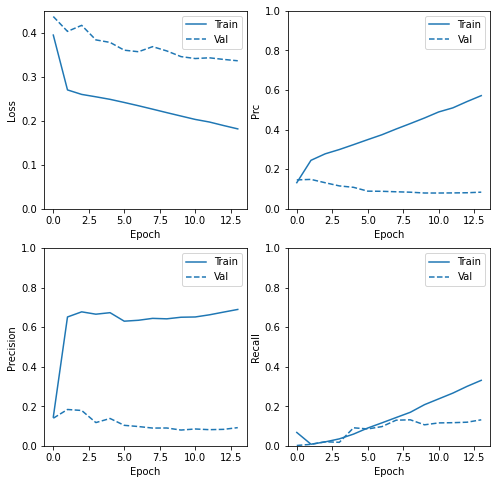

In [ ]:
%%time
def get_callbacks(name):
  return [ tf.keras.callbacks.EarlyStopping(monitor='val_prc', patience=3), tf.keras.callbacks.TensorBoard(logdir/name)]

model2.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=False),
    #optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    optimizer=get_optimizer(),
    metrics=[METRICS],
)

history_mlpt = model2.fit(
    npX, npY[:,:], validation_data=(npXtest, npYtest[:,:]), batch_size=BATCH_SIZE, epochs=30, callbacks=get_callbacks('MLP')
)
plot_metrics(history_mlpt)

In [ ]:
pred_mlp2 = model2.predict(npXtest[:,:,:])

In [ ]:
accuracy_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.8703630623520127

In [ ]:
precision_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.13149931224209077

In [ ]:
recall_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.09183477425552354

In [ ]:
f1_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.10814479638009049

In [ ]:
results = {}
pred_mlp2 = model2.predict(npXtest[:,:,:])
for k, b in enumerate(pred_mlp2.T):
  results[bairros[k]] = {}
  results[bairros[k]]['acuracia'] = accuracy_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['precisao'] = precision_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['cobertura'] = recall_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['f1'] = f1_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))

resultado = pd.DataFrame(results).T


with pd.ExcelWriter(path,mode='a') as writer:
    resultado.to_excel(writer, sheet_name='mlp')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LSTM

### Todos

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(npX.shape[2], npX.shape[1])),
    layers.LSTM(128, return_sequences=True),
    keras.layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    #layers.GRU(512, return_sequences=True),
    layers.Flatten(),
    layers.Dense(npY.shape[1], activation='sigmoid'),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12, 128)           415232    
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 128)           0         
_________________________________________________________________
dense_15 (Dense)             (None, 12, 128)           16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 128)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 28)                43036     
Total params: 474,780
Trainable params: 474,780
Non-trainable params: 0
________________________________________________

Epoch 1/20
37/37 [==============================] - 7s 92ms/step - loss: 0.3301 - tp: 1612.0000 - fp: 8965.0000 - tn: 271977.0000 - fn: 23878.0000 - accuracy: 0.8928 - precision: 0.1524 - recall: 0.0632 - auc: 0.6490 - prc: 0.1310 - val_loss: 0.2382 - val_tp: 27.0000 - val_fp: 87.0000 - val_tn: 57094.0000 - val_fn: 3608.0000 - val_accuracy: 0.9392 - val_precision: 0.2368 - val_recall: 0.0074 - val_auc: 0.7178 - val_prc: 0.1520
Epoch 2/20
37/37 [==============================] - 1s 26ms/step - loss: 0.2670 - tp: 921.0000 - fp: 876.0000 - tn: 222885.0000 - fn: 20934.0000 - accuracy: 0.9112 - precision: 0.5125 - recall: 0.0421 - auc: 0.7432 - prc: 0.2515 - val_loss: 0.2385 - val_tp: 65.0000 - val_fp: 245.0000 - val_tn: 56936.0000 - val_fn: 3570.0000 - val_accuracy: 0.9373 - val_precision: 0.2097 - val_recall: 0.0179 - val_auc: 0.7176 - val_prc: 0.1393
Epoch 3/20
37/37 [==============================] - 1s 27ms/step - loss: 0.2597 - tp: 1280.0000 - fp: 1092.0000 - tn: 222669.0000 - fn: 205

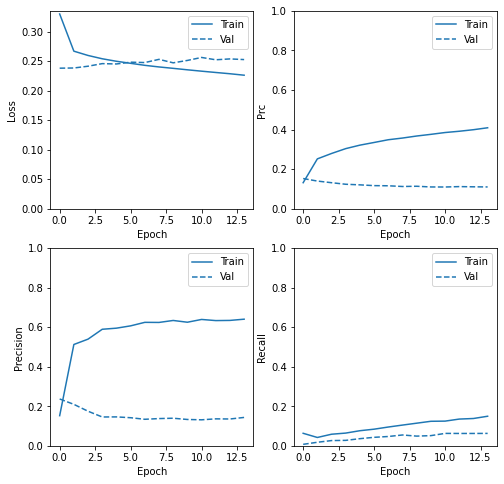

In [ ]:
%%time
def get_callbacks(name):
  return [ tf.keras.callbacks.EarlyStopping(monitor='val_prc', patience=3), tf.keras.callbacks.TensorBoard(logdir/name)]


model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=get_optimizer(),
    #optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    metrics=[METRICS],
)


history_lstm = model.fit(
    npX2, npY[:,:], validation_data=(npX2test, npYtest[:,:]), batch_size=BATCH_SIZE, epochs=20, callbacks=get_callbacks('LSTM')
)
plot_metrics(history_lstm)

In [ ]:
pred_mlp2 = model2.predict(npXtest[:,:,:])

In [ ]:
accuracy_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.8611385161799526

In [ ]:
precision_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.1515818431911967

In [ ]:
recall_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.09320027063599459

In [ ]:
f1_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.11542893055410076

In [ ]:
results = {}
pred_mlp2 = model.predict(npX2test[:,:,:])
for k, b in enumerate(pred_mlp2.T):
  results[bairros[k]] = {}
  results[bairros[k]]['acuracia'] = accuracy_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['precisao'] = precision_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['cobertura'] = recall_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['f1'] = f1_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))

resultado = pd.DataFrame(results).T


with pd.ExcelWriter(path,mode='a') as writer:
    resultado.to_excel(writer, sheet_name='lstm')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


### Res LSTM


In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
"""
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()
"""

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


"\nresidual_lstm = ResidualWrapper(\n    tf.keras.Sequential([\n    tf.keras.layers.LSTM(32, return_sequences=True),\n    tf.keras.layers.Dense(\n        num_features,\n        # The predicted deltas should start small.\n        # Therefore, initialize the output layer with zeros.\n        kernel_initializer=tf.initializers.zeros())\n]))\n\nhistory = compile_and_fit(residual_lstm, wide_window)\n\nIPython.display.clear_output()\nval_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)\nperformance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)\nprint()\n"

In [ ]:
model = ResidualWrapper(
    keras.Sequential([
    keras.Input(shape=(npX.shape[2], npX.shape[1])),
    layers.LSTM(512, return_sequences=True),
    #layers.GRU(512, return_sequences=True),
    layers.Flatten(),
    layers.Dense(npY.shape[1], activation='sigmoid', kernel_initializer=tf.initializers.zeros()),
  ])
)

In [ ]:
# não funciona
"""
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(
    loss=keras.losses.BinaryCrossentropy(),    
    #optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    metrics=[METRICS],
)


history_reslstm = model.fit(
    npX2, npY[:,:], validation_data=(npX2test, npYtest[:,:]), batch_size=1024, epochs=50
)
"""

"\ncallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)\n\nmodel.compile(\n    loss=keras.losses.BinaryCrossentropy(),    \n    #optimizer=keras.optimizers.Adam(learning_rate=1e-3),\n    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),\n    metrics=[METRICS],\n)\n\n\nhistory_reslstm = model.fit(\n    npX2, npY[:,:], validation_data=(npX2test, npYtest[:,:]), batch_size=1024, epochs=50\n)\n"

# CNN

In [ ]:
CONV_WIDTH = 4

model = keras.Sequential([
    keras.Input(shape=(npX.shape[2], npX.shape[1])),
    #layers.LSTM(512),
    layers.Conv1D(filters=64, kernel_size=(CONV_WIDTH,), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    #layers.Dense(512, activation='relu'),
    #layers.Dense(512, activation='relu'),
    #layers.Dense(512, activation='relu'),
    #layers.Dense(npY.shape[1], activation='softmax'),
    layers.Flatten(),
    layers.Dense(npY.shape[1], activation='sigmoid'),
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 64)             174656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 64)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 9, 128)            8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 128)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 28)                32284     
Total params: 215,260
Trainable params: 215,260
Non-trainable params: 0
________________________________________________

Epoch 1/20
37/37 [==============================] - 29s 70ms/step - loss: 0.3410 - tp: 2043.0000 - fp: 10613.0000 - tn: 270329.0000 - fn: 23447.0000 - accuracy: 0.8888 - precision: 0.1614 - recall: 0.0801 - auc: 0.6437 - prc: 0.1316 - val_loss: 0.2177 - val_tp: 74.0000 - val_fp: 255.0000 - val_tn: 56926.0000 - val_fn: 3561.0000 - val_accuracy: 0.9373 - val_precision: 0.2249 - val_recall: 0.0204 - val_auc: 0.7061 - val_prc: 0.1418
Epoch 2/20
37/37 [==============================] - 1s 20ms/step - loss: 0.2776 - tp: 1280.0000 - fp: 1694.0000 - tn: 222067.0000 - fn: 20575.0000 - accuracy: 0.9093 - precision: 0.4304 - recall: 0.0586 - auc: 0.7251 - prc: 0.2286 - val_loss: 0.2219 - val_tp: 118.0000 - val_fp: 438.0000 - val_tn: 56743.0000 - val_fn: 3517.0000 - val_accuracy: 0.9350 - val_precision: 0.2122 - val_recall: 0.0325 - val_auc: 0.6980 - val_prc: 0.1372
Epoch 3/20
37/37 [==============================] - 1s 18ms/step - loss: 0.2664 - tp: 1506.0000 - fp: 1498.0000 - tn: 222263.0000 - f

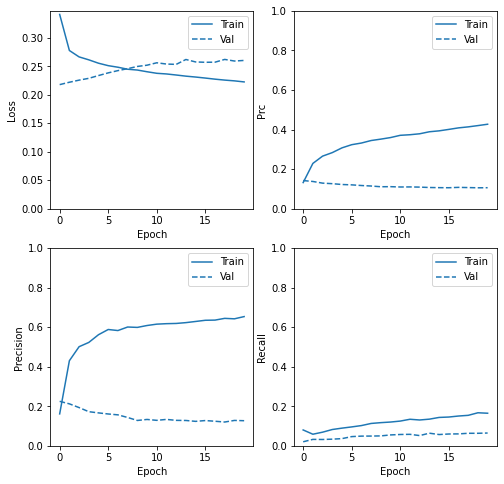

In [ ]:
%%time
def get_callbacks(name):
  return [ tf.keras.callbacks.EarlyStopping(monitor='val_prc', patience=3), tf.keras.callbacks.TensorBoard(logdir/name)]


model.compile(
    #loss=keras.losses.MeanAbsoluteError(),
    loss=keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=get_optimizer(),    
    #optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[METRICS],
)


history_cnn = model.fit(
    npX2, npY[:,:], validation_data=(npX2test, npYtest[:,:]), batch_size=BATCH_SIZE, epochs=20, callbacks=get_callbacks('LSTM')
)

plot_metrics(history_cnn)

In [ ]:
pred_mlp2 = model.predict(npX2test[:,:,:])

In [ ]:
accuracy_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,].flatten()))

0.9175052617732176

In [ ]:
recall_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,].flatten()))

0.12688984881209503

In [ ]:
f1_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,].flatten()))

0.08565700747220706

In [ ]:
f1_score(pd.Series(pred_mlp2.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.08565700747220706

In [ ]:
results = {}
pred_mlp2 = model.predict(npX2test[:,:,:])
for k, b in enumerate(pred_mlp2.T):
  results[bairros[k]] = {}
  results[bairros[k]]['acuracia'] = accuracy_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['precisao'] = precision_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['cobertura'] = recall_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))
  results[bairros[k]]['f1'] = f1_score(npYtest[:,k], pd.Series(pred_mlp2[:,k].flatten()).map(convert))

resultado = pd.DataFrame(results).T


with pd.ExcelWriter(path,mode='a') as writer:
    resultado.to_excel(writer, sheet_name='cnn')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


## CNN +  LSTM

In [ ]:
CONV_WIDTH = 4

model = keras.Sequential([
    keras.Input(shape=(npX4.shape[1], npX4.shape[2], npX4.shape[3])),
    #layers.Conv1D(filters=32, kernel_size=(CONV_WIDTH,), activation='relu'),
    #layers.GRU(512),
    layers.ConvLSTM1D(filters=64, kernel_size=(CONV_WIDTH,), activation='relu'),
    layers.MaxPooling1D(pool_size=2, strides=1, padding='valid'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    #layers.Dense(512, activation='relu'),
    #layers.Dense(512, activation='relu'),
    #layers.Dense(npY.shape[1], activation='softmax'),
    layers.Flatten(),
    layers.Dense(npY.shape[1], activation='sigmoid'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m1d (ConvLSTM1D)    (None, 8, 64)             129280    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 64)             0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 64)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 7, 128)            8320      
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 128)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 28)               

Epoch 1/20
37/37 [==============================] - 16s 282ms/step - loss: 0.3363 - tp: 1736.0000 - fp: 9953.0000 - tn: 270989.0000 - fn: 23754.0000 - accuracy: 0.8900 - precision: 0.1485 - recall: 0.0681 - auc: 0.6492 - prc: 0.1287 - val_loss: 0.2162 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 57180.0000 - val_fn: 3635.0000 - val_accuracy: 0.9402 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7276 - val_prc: 0.1573
Epoch 2/20
37/37 [==============================] - 7s 188ms/step - loss: 0.2721 - tp: 414.0000 - fp: 552.0000 - tn: 223209.0000 - fn: 21441.0000 - accuracy: 0.9105 - precision: 0.4286 - recall: 0.0189 - auc: 0.7318 - prc: 0.2253 - val_loss: 0.2160 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 57181.0000 - val_fn: 3635.0000 - val_accuracy: 0.9402 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7227 - val_prc: 0.1542
Epoch 3/20
37/37 [==============================] - 7s 190ms/step - loss: 0.2673 - tp: 332.0000 - fp: 428.0000 - 

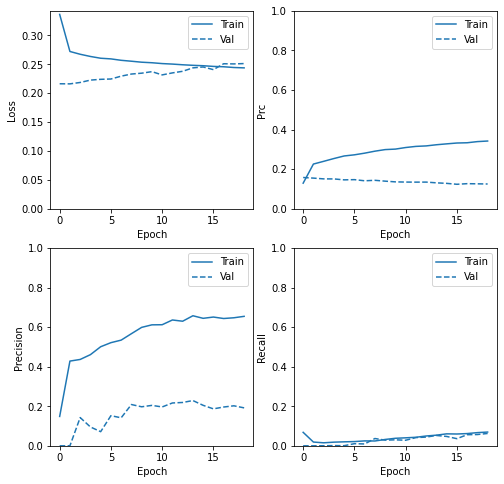

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(
    #loss=keras.losses.MeanAbsoluteError(),
    loss=keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=get_optimizer(), 
    #optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[METRICS],
)


history_cnnlstm = model.fit(
    npX4, npY[:,:], validation_data=(npX4test, npYtest[:,:]), batch_size=BATCH_SIZE, epochs=20, callbacks=get_callbacks('LSTM')
)
 
plot_metrics(history_cnnlstm)

In [ ]:
pred_mlp4 = model.predict(npX4test[:,:,:])

In [ ]:
accuracy_score(pd.Series(pred_mlp4.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.9282425677453302

In [ ]:
precision_score(pd.Series(pred_mlp4.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.0624484181568088

In [ ]:
recall_score(pd.Series(pred_mlp4.flatten()).map(convert), pd.Series(npYtest[:,:].flatten()))

0.19188503803888418

In [ ]:
f1_score(pd.Series(pred_mlp4.flatten()).map(convert), pd.Series(npYtest[:,].flatten()))

0.0942299709422997

In [ ]:
results = {}
pred_mlp4 = model.predict(npX4test[:,:,:])
for k, b in enumerate(pred_mlp2.T):
  results[bairros[k]] = {}
  results[bairros[k]]['acuracia'] = accuracy_score(npYtest[:,k], pd.Series(pred_mlp4[:,k].flatten()).map(convert))
  results[bairros[k]]['precisao'] = precision_score(npYtest[:,k], pd.Series(pred_mlp4[:,k].flatten()).map(convert))
  results[bairros[k]]['cobertura'] = recall_score(npYtest[:,k], pd.Series(pred_mlp4[:,k].flatten()).map(convert))
  results[bairros[k]]['f1'] = f1_score(npYtest[:,k], pd.Series(pred_mlp4[:,k].flatten()).map(convert))

resultado = pd.DataFrame(results).T


with pd.ExcelWriter(path,mode='a') as writer:
    resultado.to_excel(writer, sheet_name='cnnlstm')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [ ]:
resultado

,acuracia,precisao,cobertura,f1
AREIAS,0.976059,0.000000,0.000000,0.000000
BEBERIBE,0.974678,0.000000,0.000000,0.000000
BOA VIAGEM,0.515193,0.239306,0.343854,0.282209
BOA VISTA,0.873389,0.074468,0.035897,0.048443
CABANGA,0.959024,0.000000,0.000000,0.000000
CASA AMARELA,0.897330,0.000000,0.000000,0.000000
CASA FORTE,0.930939,0.000000,0.000000,0.000000
CAÇOTE,1.000000,0.000000,0.000000,0.000000
CURADO,0.994475,0.000000,0.000000,0.000000
DERBY,0.955801,0.000000,0.000000,0.000000


Sem acidente previsto e ocorrido (True Negatives):  56225
Com acidente previsto, mas não ocorrido (False Positives):  956
Sem acidente previsto, mas ocorrido (False Negatives):  3408
Com acidente previsto e ocorrido (True Positives):  227
Total de acidentes:  3635


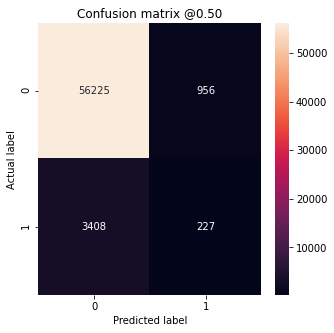

In [ ]:
plot_cm(pd.Series(npYtest[:,].flatten()), pd.Series(pred_mlp4.flatten()))